In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conn = sqlite3.connect("database.sqlite")


tables = ['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes']


df_country = pd.read_sql_query("SELECT * FROM Country", conn)
df_league = pd.read_sql_query("SELECT * FROM League", conn)
df_match = pd.read_sql_query("SELECT * FROM Match", conn)
df_player = pd.read_sql_query("SELECT * FROM Player", conn)
df_player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
df_team = pd.read_sql_query("SELECT * FROM Team", conn)
df_team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)


conn.close()

In [2]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [3]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [4]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [ ]:
matches = pd.merge(df_match, df_league, on='country_id', how='inner')
matches.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,1,Belgium Jupiler League


In [6]:
matches.columns

Index(['id_x', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'id_y', 'name'],
      dtype='object', length=117)

In [ ]:
import pandas as pd

matches = matches[matches['country_id'].isin([1729,4769,7809,10257,21518])]

matches['date'] = pd.to_datetime(matches['date'])


def get_filter_year():
    year = pd.to_datetime('2015-01-01')
    return year


def aggregate_numeric(x):
    return x.mean()


def aggregate_categorical(x):
    return x.mode().iloc[0]


filter_year = get_filter_year()


matches = matches[matches['date'] >= filter_year]

matches.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_y,name
4128,4129,1729,1729,2014/2015,20,2015-01-01,1724172,10252,9826,0,...,3.20,3.4,NaN,NaN,NaN,NaN,NaN,NaN,1729,England Premier League
4129,4130,1729,1729,2014/2015,20,2015-01-01,1724173,8667,8668,2,...,3.30,2.3,NaN,NaN,NaN,NaN,NaN,NaN,1729,England Premier League
4130,4131,1729,1729,2014/2015,20,2015-01-01,1724174,8650,8197,2,...,5.00,8.5,NaN,NaN,NaN,NaN,NaN,NaN,1729,England Premier League
4131,4132,1729,1729,2014/2015,20,2015-01-01,1724175,8456,8472,3,...,6.50,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1729,England Premier League
4132,4133,1729,1729,2014/2015,20,2015-01-01,1724176,10261,8191,3,...,3.75,4.8,NaN,NaN,NaN,NaN,NaN,NaN,1729,England Premier League


In [8]:
[i for i in matches.columns]

['id_x',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_play

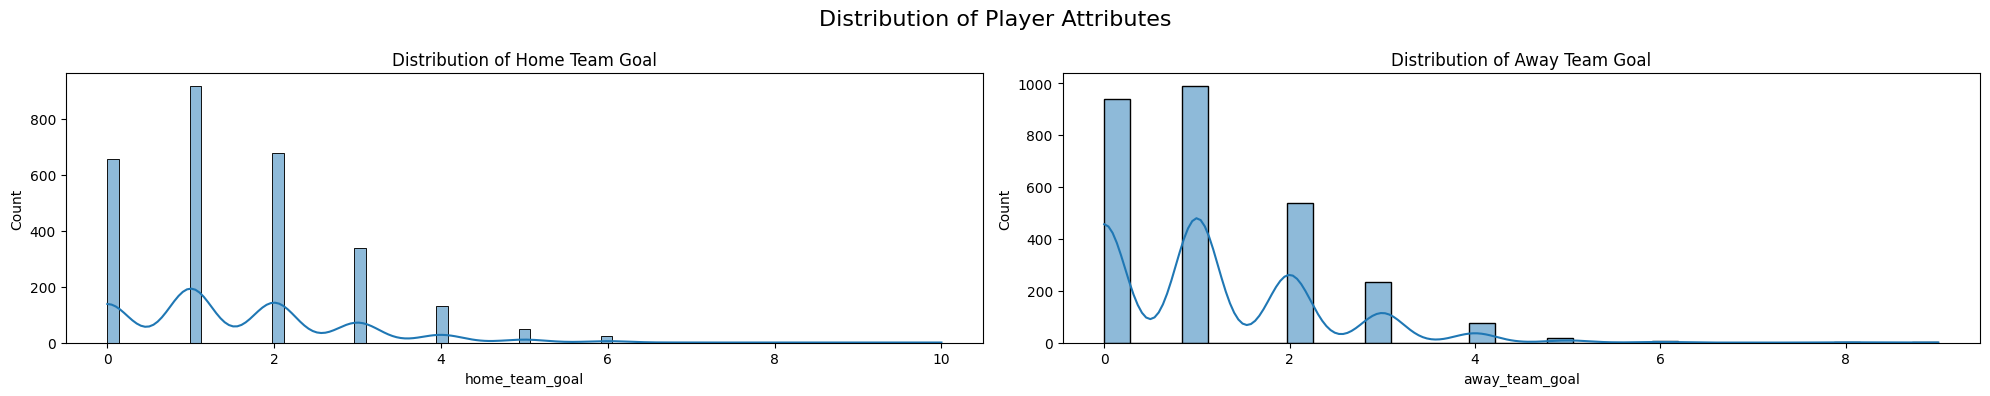

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

attributes = ['home_team_goal','away_team_goal',]


n_attrs = len(attributes)

n_rows = math.ceil(n_attrs / n_cols)


fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.suptitle('Distribution of Player Attributes', fontsize=16)


axs = axs.flatten()

for i, attr in enumerate(attributes):
    sns.histplot(matches[attr], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {attr.replace("_", " ").title()}')
    axs[i].set_xlabel(attr)
    axs[i].set_ylabel('Count')


for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()